In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn.ensemble import IsolationForest,RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import KFold,cross_val_score,StratifiedKFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import log_loss,roc_auc_score,f1_score,accuracy_score
from sklearn.preprocessing import StandardScaler


from warnings import simplefilter
simplefilter("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
from xgboost import XGBClassifier


In [9]:
data = pd.read_csv('C:/Users/DELL/Downloads/creditcard.csv/creditcard.csv')



# Displaying all the columns in the dataset"C:\Users\DELL\Downloads\creditcard.csv\creditcard.csv"
pd.set_option("display.max_columns",1000)

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
print('The dataset has {} rows and {} columns.'.format(data.shape[0],data.shape[1]))

The dataset has 284807 rows and 31 columns.


In [12]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [13]:
print('There are {} duplicate values out of {} ({:.2f}%).'.format(data.duplicated().sum(),
      data.shape[0],data.duplicated().sum()/data.shape[0]*100))

There are 1081 duplicate values out of 284807 (0.38%).


In [14]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [15]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


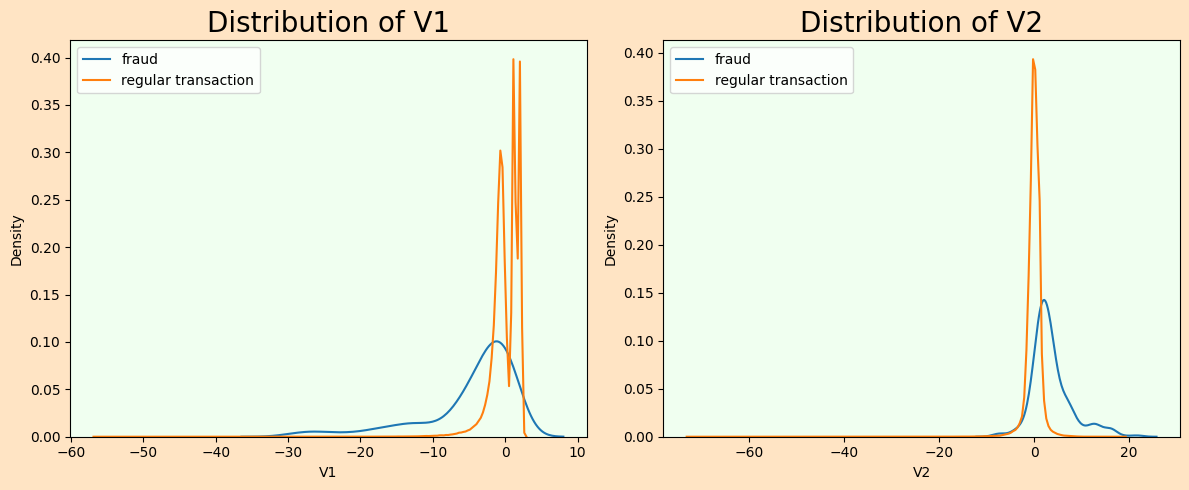

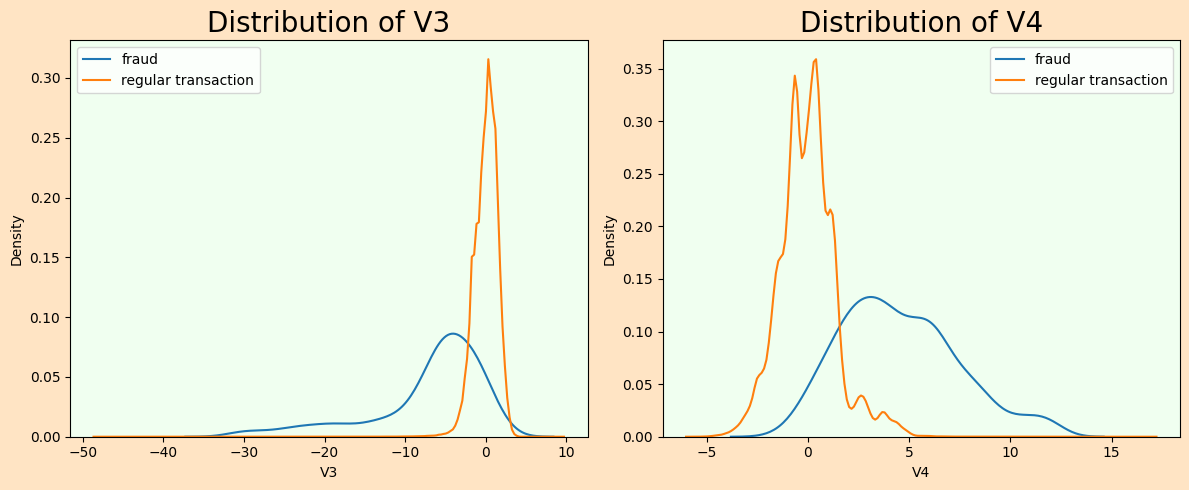

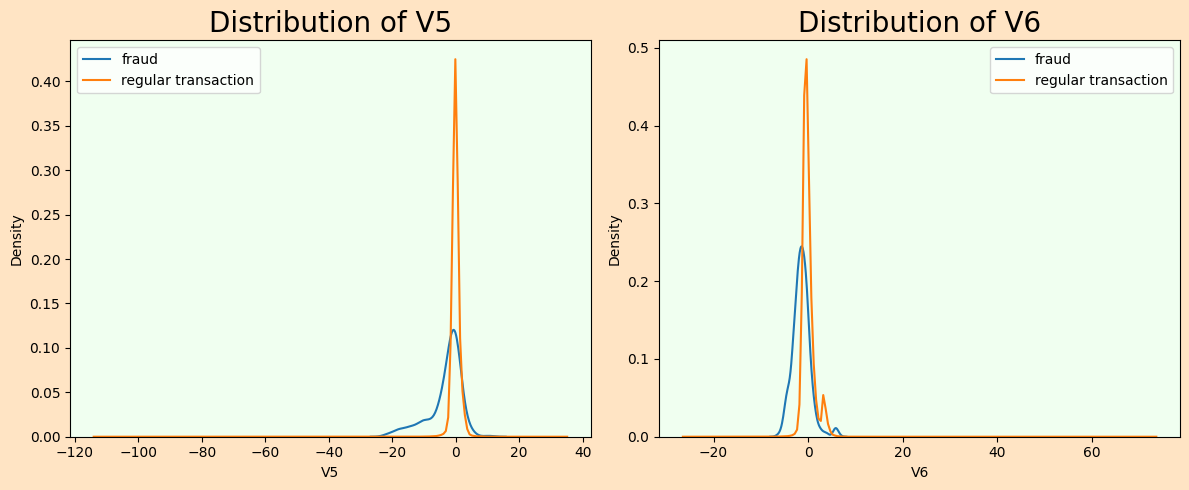

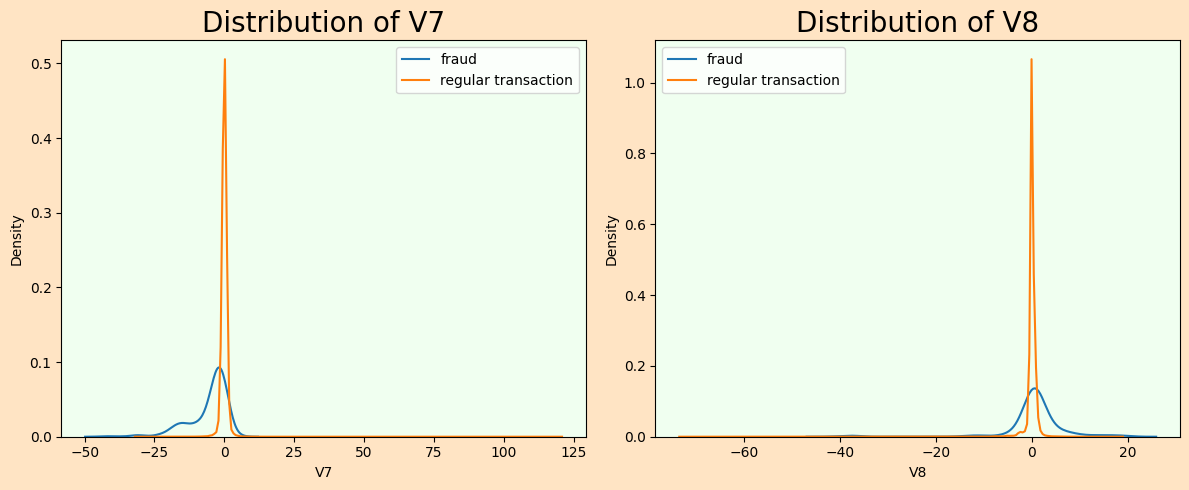

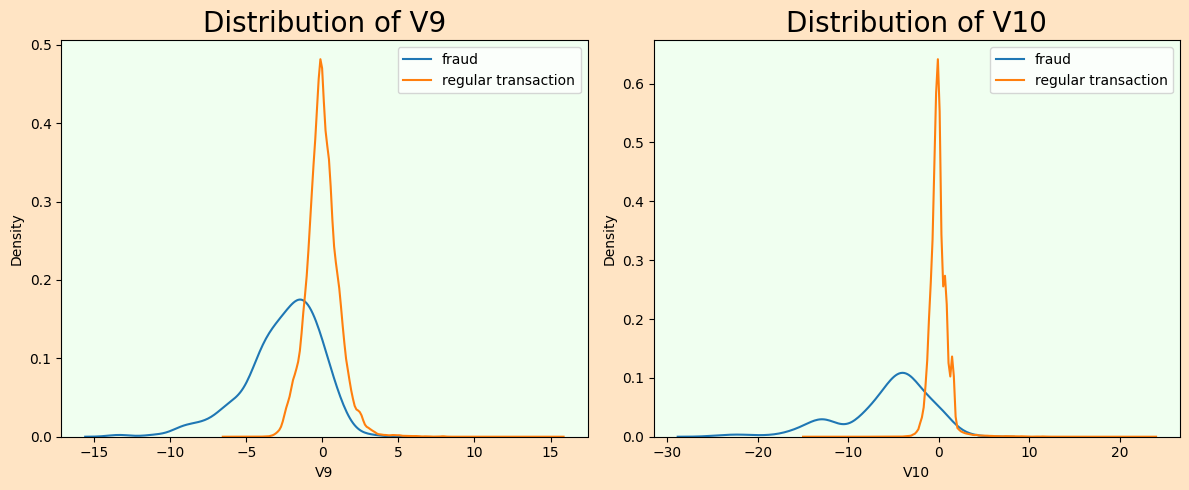

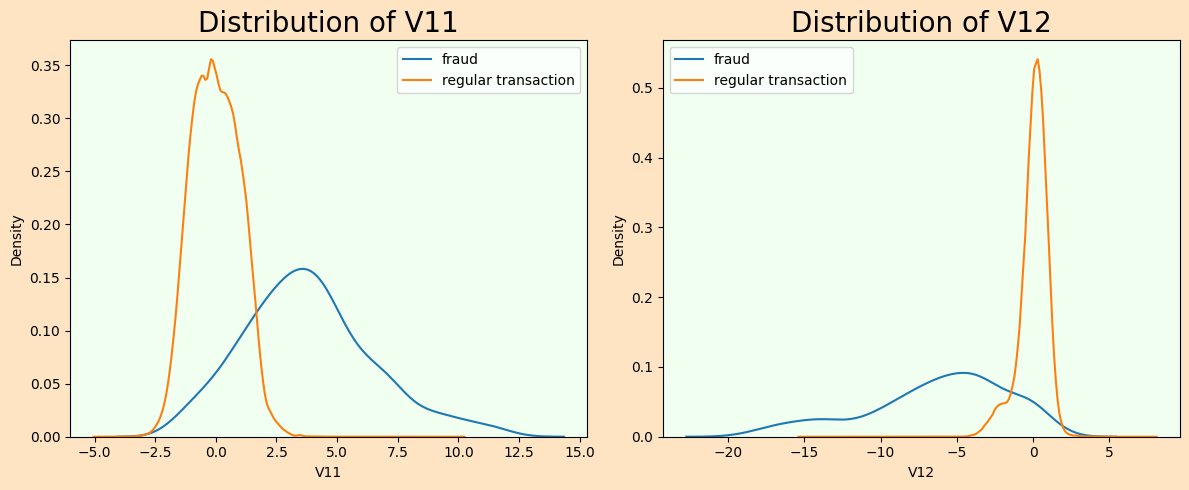

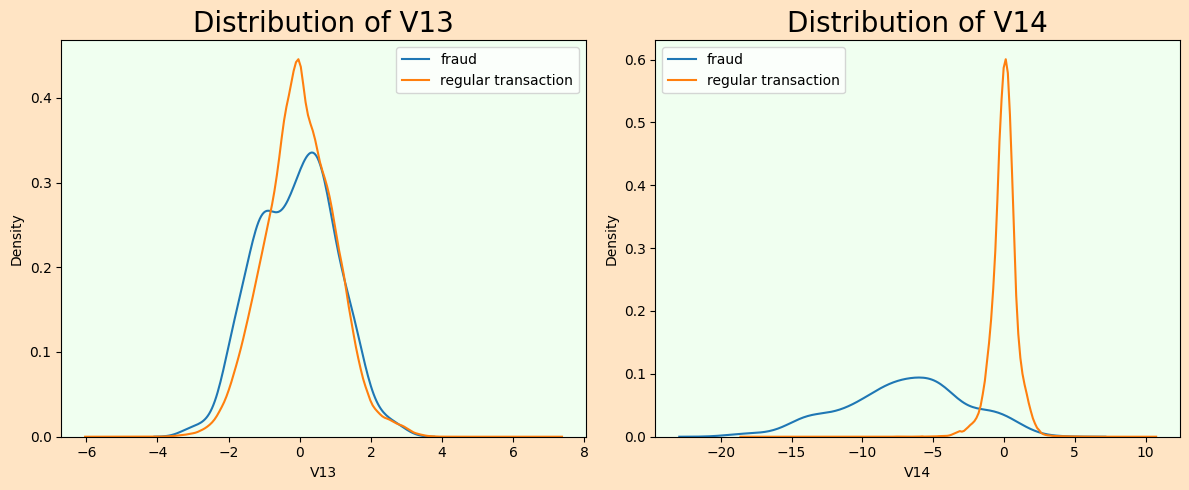

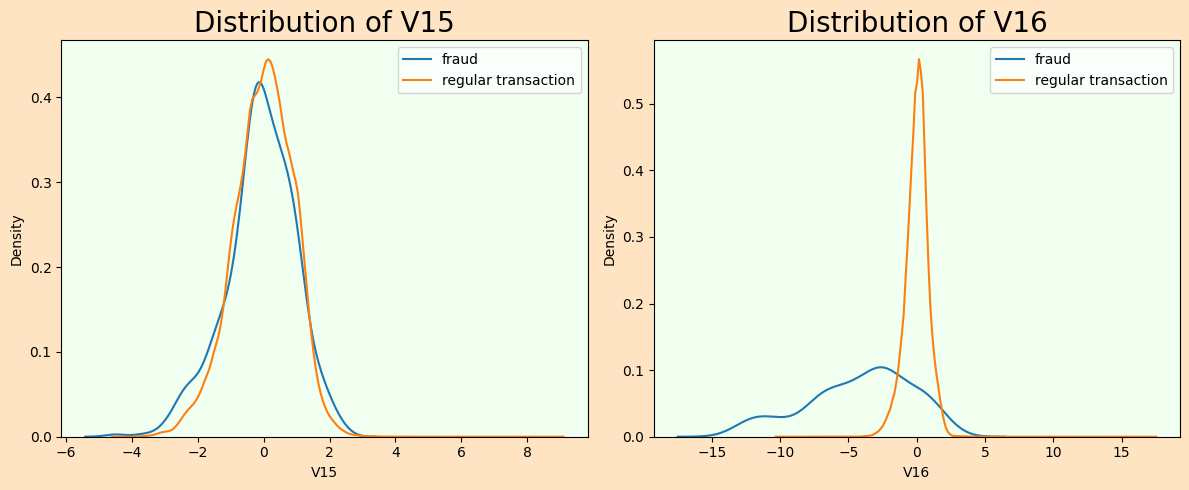

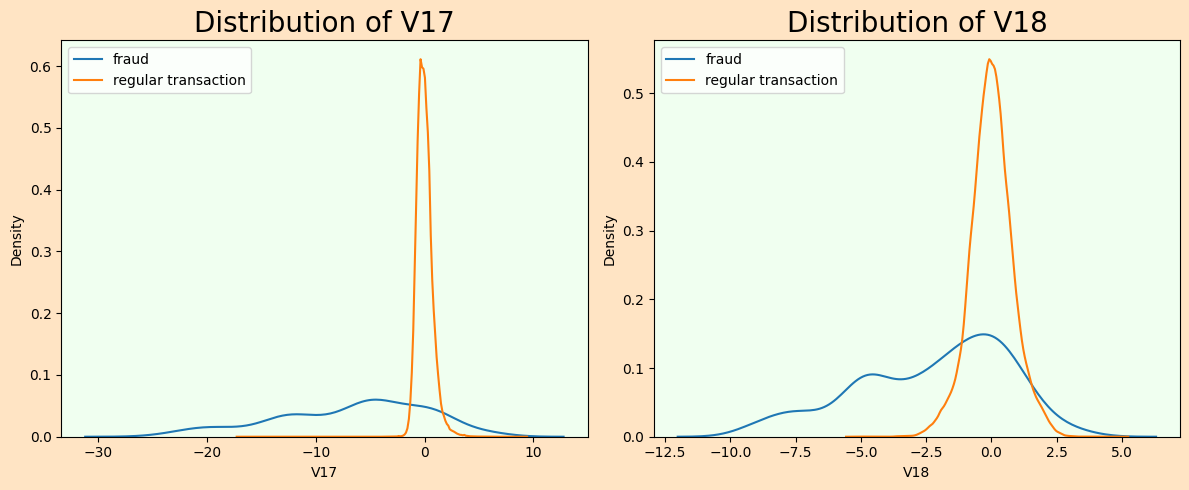

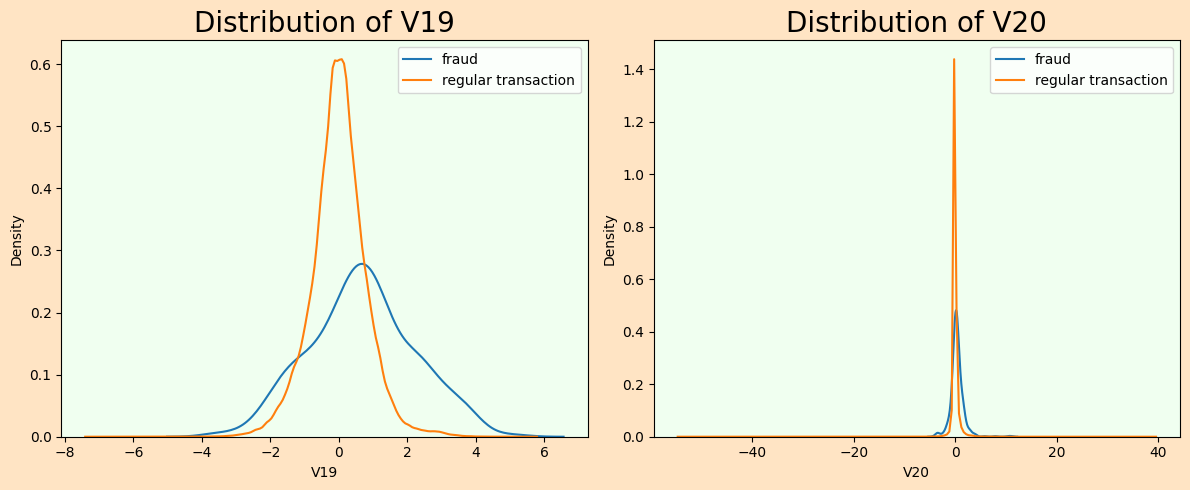

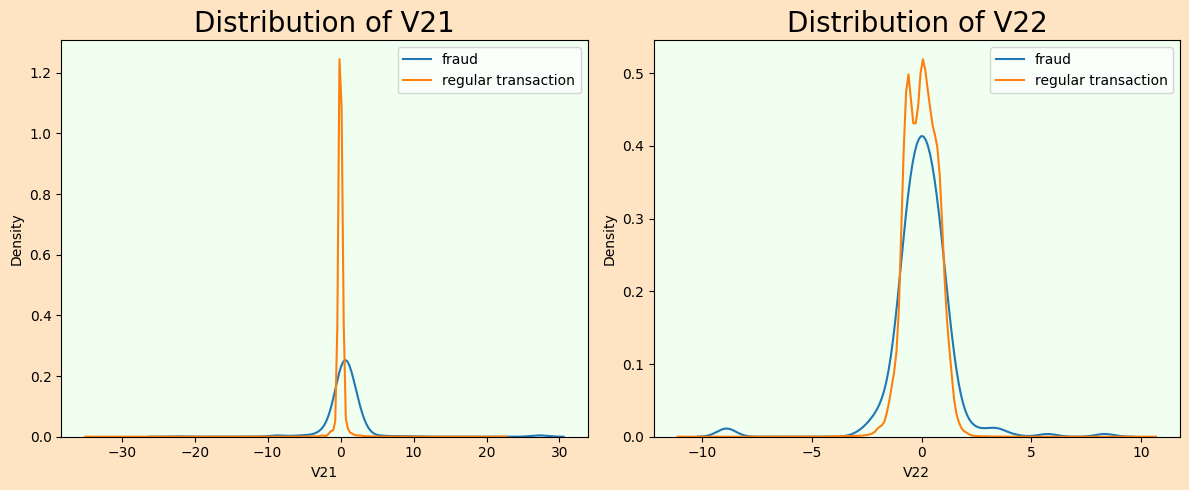

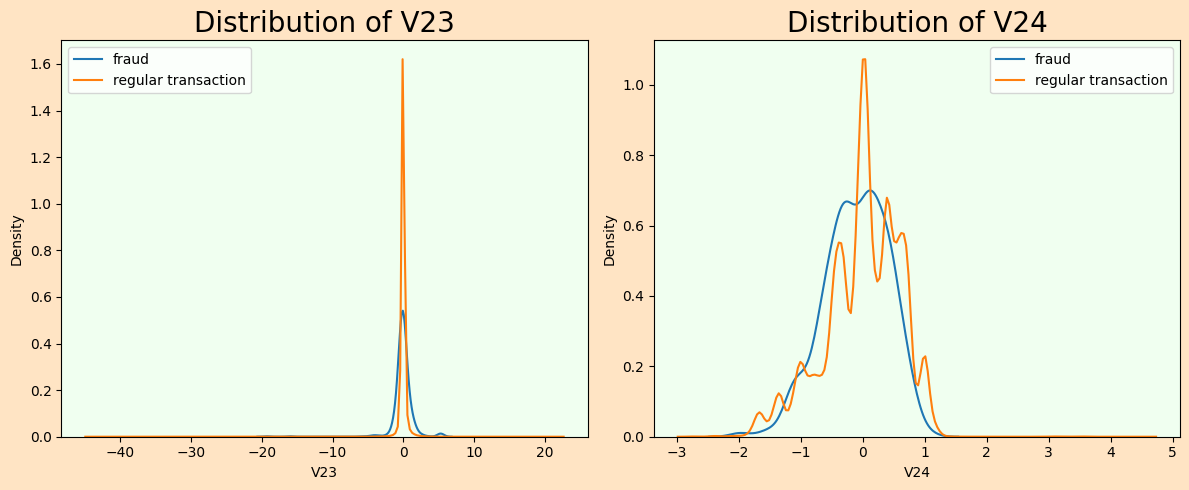

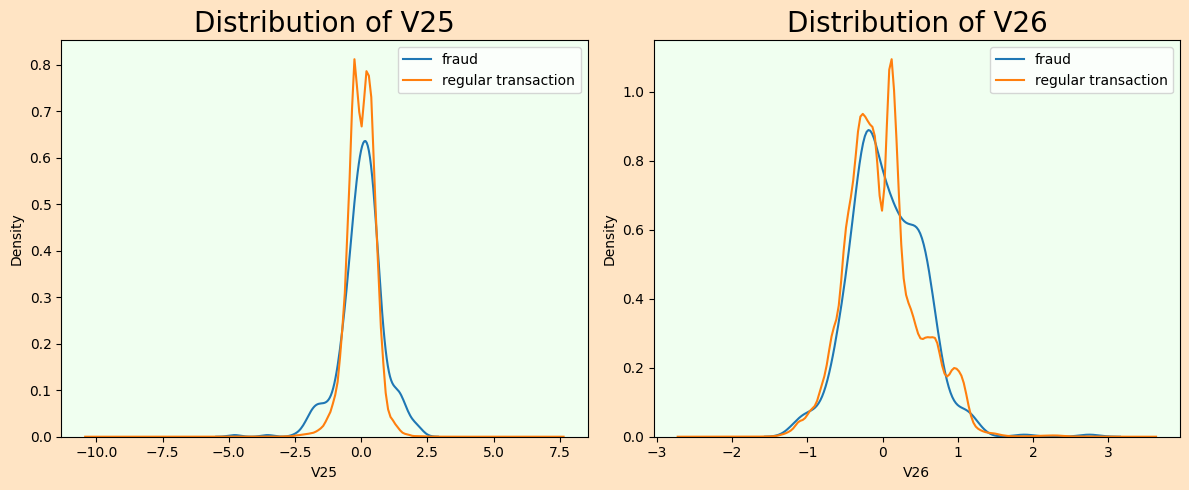

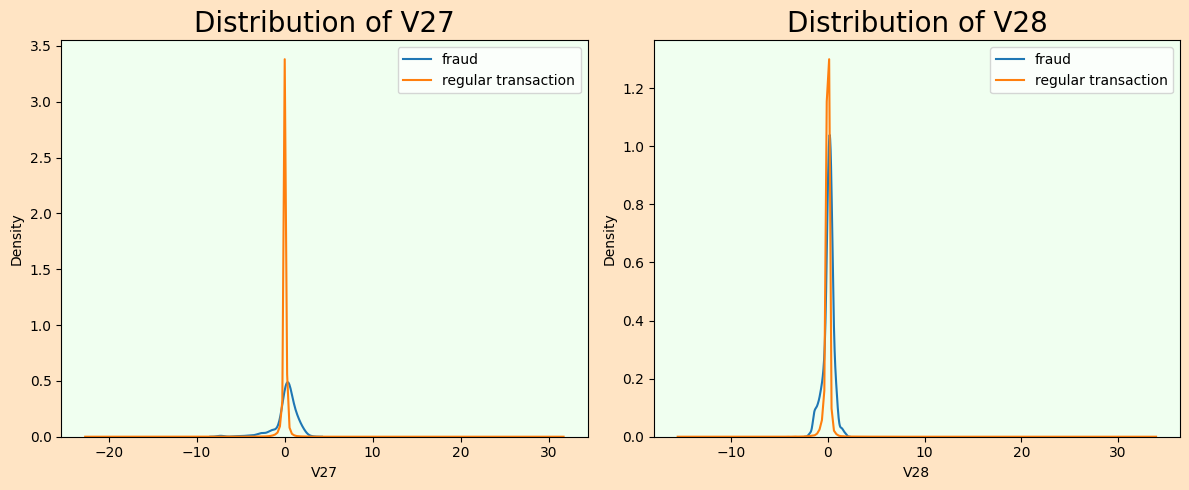

In [16]:
features = list(data.columns.values)
del features[0]
del features[28]
del features[28]

for i in range(14):
    fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
    ax1 = sns.distplot(data[data.Class == 1][features[i*2]],ax=ax1,hist=False)
    ax1 = sns.distplot(data[data.Class == 0][features[i*2]],ax=ax1,hist=False)
    ax1.set_title('Distribution of '+str(features[i*2]),fontsize=20)
    ax1.set_facecolor('honeydew')
    ax1.legend(labels=['fraud','regular transaction'])
    ax2 = sns.distplot(data[data.Class == 1][features[i*2+1]],ax=ax2,hist=False)
    ax2 = sns.distplot(data[data.Class == 0][features[i*2+1]],ax=ax2,hist=False)
    ax2.set_title('Distribution of '+str(features[i*2+1]),fontsize=20)
    ax2.set_facecolor('honeydew')
    ax2.legend(labels=['fraud','regular transaction'])
    
    plt.tight_layout()
    fig.set_facecolor('bisque')

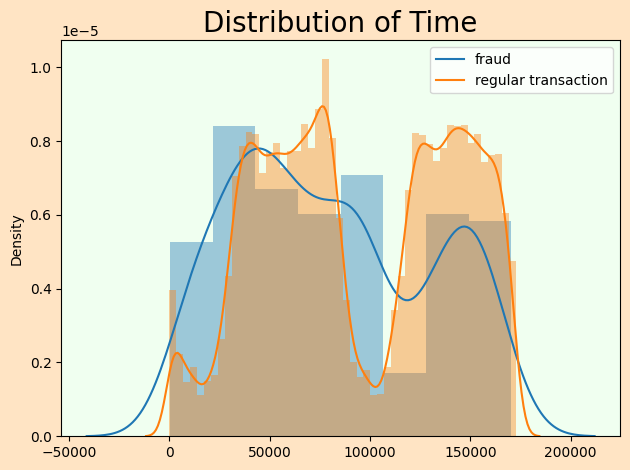

In [17]:
sns.distplot(data['Time'][data.Class == 1])
sns.distplot(data['Time'][data.Class == 0])
plt.xlabel('')
plt.title('Distribution of Time',fontsize=20)
plt.legend(labels=['fraud','regular transaction'])

plt.gca().set_facecolor('honeydew')
plt.gcf().patch.set_facecolor('bisque')   
plt.tight_layout()
plt.show()

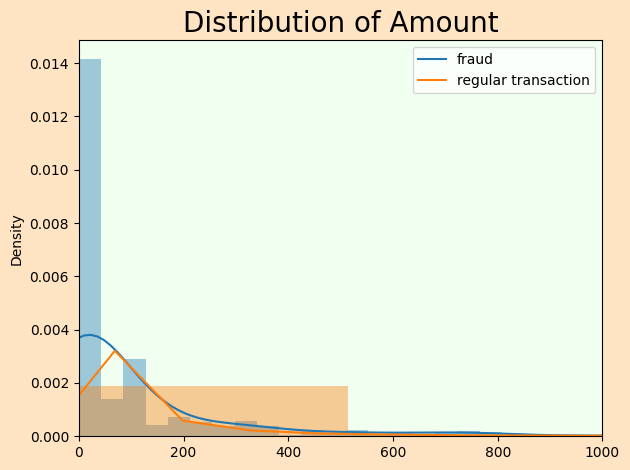

In [18]:
sns.distplot(data['Amount'][data.Class == 1])
sns.distplot(data['Amount'][data.Class == 0])
plt.xlim(0,1000)
plt.xlabel('')
plt.title('Distribution of Amount',fontsize=20)
plt.legend(labels=['fraud','regular transaction'])

plt.gca().set_facecolor('honeydew')
plt.gcf().patch.set_facecolor('bisque')   
plt.tight_layout()
plt.show()

In [19]:
print('There are {} duplicate values in regular transactions out of {} ({:.2f}%).'.format(data[data['Class'] == 0].duplicated().sum(),data[data['Class'] == 0].shape[0],data[data['Class'] == 0].duplicated().sum()/data[data['Class'] == 0].shape[0]*100))

print('There are {} duplicate values in fraudolent transactions out of {} ({:.2f}%).'.format(data[data['Class'] == 1].duplicated().sum(),data[data['Class'] == 1].shape[0],data[data['Class'] == 1].duplicated().sum()/data[data['Class'] == 1].shape[0]*100))

There are 1062 duplicate values in regular transactions out of 284315 (0.37%).
There are 19 duplicate values in fraudolent transactions out of 492 (3.86%).


In [20]:
print('No. of rows before dropping duplicates: {}.'.format(len(data)))

data.drop_duplicates(inplace=True)

print('No. of rows after dropping duplicates: {}.'.format(len(data)))

No. of rows before dropping duplicates: 284807.
No. of rows after dropping duplicates: 283726.


In [21]:
print('No. of rows before dropping duplicates: {}.'.format(len(data)))

data.drop_duplicates(inplace=True)

print('No. of rows after dropping duplicates: {}.'.format(len(data)))

No. of rows before dropping duplicates: 283726.
No. of rows after dropping duplicates: 283726.
